The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


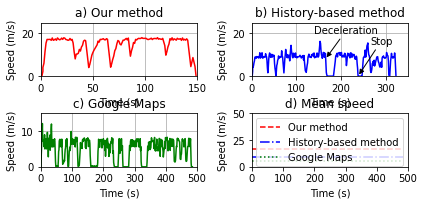

In [84]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import statistics
import csv
x = []
y = []
plt.figure()


# linear
plt.subplot(221)
with open('vehicle3min.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[4]))
        y.append(float(row[8])*(5/18))
        
x2 = []
y2 = []

plt.axis([0, 150, 0, 25])
plt.plot(x,y, c='r')
plt.xlabel(r'Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('a) Our method')
plt.grid(True)

plt.subplot(222)

with open('vehicle5min.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x2.append(int(row[4]))
        y2.append(float(row[8])*(5/18))
        
x3 = []
y3 = []

plt.axis([0, 350, 0, 25])
plt.plot(x2,y2, c='b')
plt.xlabel(r'Time (s)')
plt.ylabel('Speed (m/s)')
plt.annotate('Deceleration', xy=(165, 8), xytext=(140,20),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.annotate('Stop', xy=(238, 0), xytext=(265,15),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))
plt.title('b) History-based method')
plt.grid(True)

plt.subplot(223)

with open('vehicle8min.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x3.append(int(row[4]))
        y3.append(float(row[8])*(5/18))
        
plt.axis([0, 500, 0, 15])
plt.plot(x3,y3, c='g')
plt.xlabel(r'Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('c) Google Maps')
plt.grid(True)

plt.subplot(224)

yMean = [statistics.median(y)]*len(x3) 
y2Mean = [statistics.median(y2)]*len(x3)   
y3Mean = [statistics.median(y3)]*len(x3)   

plt.plot(x3,yMean, c='r', label='Our method', linestyle='--')
plt.plot(x3,y2Mean, c='b', label='History-based method', linestyle='-.')
plt.plot(x3,y3Mean, c='g', label='Google Maps', linestyle=':')


plt.axis([0, 500, 0, 50])
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('d) Mean speed')
plt.legend(loc='upper right')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.savefig("result_speed_patterns.eps", format='eps')
plt.savefig("result_speed_patterns.pdf")

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


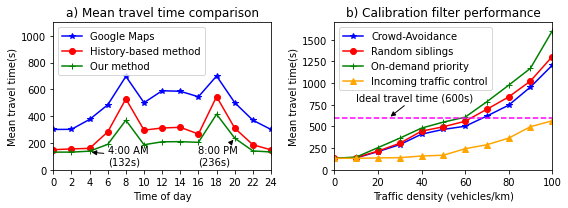

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,3)
plt.figure()
plt.subplot(121)

threshold = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
line1 = [301, 302 , 376, 485, 697, 501, 590, 586, 545, 700, 501, 370, 301]
line2 = [150, 156, 160, 283, 529, 296, 312, 317, 267, 546, 311, 187, 149]
line3 = [132, 132, 139, 190, 370, 187, 209, 210, 205, 415, 236, 141, 133]
plt.axis([0, 24, 0, 1100])
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.plot(threshold, line1, color='blue', marker = '*')
plt.plot(threshold, line2, color='red', marker = 'o')
plt.plot(threshold, line3, color='green', marker = '+')
plt.annotate('8:00 PM \n(236s)', xy=(20, 236), xytext=(16,40),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))
plt.annotate('4:00 AM \n(132s)', xy=(4, 132), xytext=(6,40),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))
plt.legend(('Google Maps', 'History-based method', 'Our method'),loc='upper left')
plt.xlabel('Time of day')
plt.ylabel('Mean travel time(s)')
plt.title('a) Mean travel time comparison')

plt.subplot(122)
threshold = [0, 10, 20, 30, 40, 50, 60,70, 80, 90,100]
line1 = [133, 138, 210, 290, 411, 466, 502, 620, 745, 954, 1205]
line2 = [133, 141, 216, 306, 446, 496, 560, 698, 840, 1023, 1305]
line3 = [133, 147, 256, 365, 481, 550, 607, 785, 975, 1170, 1600]
line4 = [133, 133, 137, 140, 159, 168, 243, 289, 365, 497, 565]
plt.axis([0, 100, 0, 1700])
plt.plot(threshold, line1, color='blue', marker = '*')
plt.plot(threshold, line2, color='red', marker = 'o')
plt.plot(threshold, line3, color='green', marker = '+')
plt.plot(threshold, line4, color='orange', marker = '^')
plt.axhline(y=600, color='magenta', linestyle='--')

plt.annotate('Ideal travel time (600s)', xy=(25, 600), xytext=(10,800),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.legend(('Crowd-Avoidance', 'Random siblings', 'On-demand priority' , 'Incoming traffic control'),loc='upper left')
plt.xlabel('Traffic density (vehicles/km)')
plt.ylabel('Mean travel time(s)')
plt.title('b) Calibration filter performance')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.tight_layout()
plt.savefig("result_mean_travel_calibration_filter.eps", format="eps")
plt.savefig("result_mean_travel_calibration_filter.pdf")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


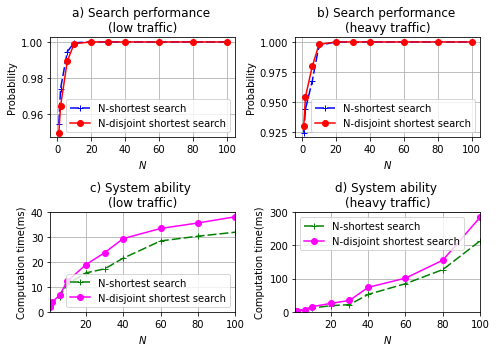

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# make up some data in the interval ]0, 1[

# plot with various axes scales
plt.rcParams["figure.figsize"] = (7,5)

plt.figure()


# linear
plt.subplot(221)

threshold = [1, 2, 6, 10, 20, 30, 40, 60, 80, 100]
line1 = [ 0.954852, 0.974151, 0.994624, 0.999549, 1, 1, 1, 1, 1, 1]
line2 = [ 0.949913, 0.964573, 0.989485, 0.999017, 1, 1, 1, 1, 1, 1]
plt.plot(threshold, line1, color='blue', dashes=[6, 2], marker = '+')
plt.plot(threshold, line2, color='red', marker = 'o')
plt.legend((r'N-shortest search', r'N-disjoint shortest search'),loc='lower right')
plt.xlabel(r'$N$')
plt.ylabel('Probability')
plt.title('a) Search performance \n(low traffic)')
plt.grid(True)

# symmetric log
plt.subplot(222)

threshold = [1, 2, 6, 10, 20, 30, 40, 60, 80, 100]
line1 = [ 0.924624, 0.944112, 0.96753, 0.997123, 1, 1, 1, 1, 1, 1]
line2 = [ 0.929951, 0.954322, 0.979687, 0.998001, 1, 1, 1, 1, 1, 1]
plt.plot(threshold, line1, color='blue', dashes=[6, 2], marker = '+')
plt.plot(threshold, line2, color='red', marker = 'o')
plt.legend((r'N-shortest search', r'N-disjoint shortest search'),loc='lower right')
plt.xlabel(r'$N$')
plt.ylabel('Probability')
plt.title('b) Search performance \n(heavy traffic)')
plt.grid(True)

# symmetric log
plt.subplot(223)

threshold = [1, 2, 6, 10, 20, 30, 40, 60, 80, 100]
line1 = [ 1.8, 3.7, 6.1, 11.1, 15.6, 17.2, 21.5, 28.4, 30.3, 31.9]
line2 = [ 1.8, 3.9, 6.8, 12.2, 18.9, 23.7, 29.34, 33.40, 35.6, 38.1]
plt.plot(threshold, line1, color='green', dashes=[6, 2], marker = '+')
plt.plot(threshold, line2, color='magenta', marker = 'o')
plt.axis([1, 100, 0, 40])
plt.legend((r'N-shortest search', r'N-disjoint shortest search'),loc='lower right')
plt.xlabel(r'$N$')
plt.ylabel('Computation time(ms)')
plt.title('c) System ability \n(low traffic)')
plt.grid(True)

# symmetric log
plt.subplot(224)

threshold = [1, 2, 6, 10, 20, 30, 40, 60, 80, 100]
line1 = [ 1.8, 3.7, 6.3, 11.4, 18.5, 21.5, 52.3, 84.5, 126.9, 213.3]
line2 = [ 1.8, 3.9, 6.9, 15.5, 25.3, 34.2, 73.5, 101.2, 155.1, 284.5]
plt.plot(threshold, line1, color='green', dashes=[6, 2], marker = '+')
plt.plot(threshold, line2, color='magenta', marker = 'o')
plt.axis([1, 100, 0, 300])
plt.legend((r'N-shortest search', r'N-disjoint shortest search'),loc='upper left')
plt.xlabel(r'$N$')
plt.ylabel('Computation time(ms)')
plt.title('d) System ability \n(heavy traffic)')
plt.grid(True)

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.5)
plt.tight_layout()
plt.savefig("result_influence_N.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


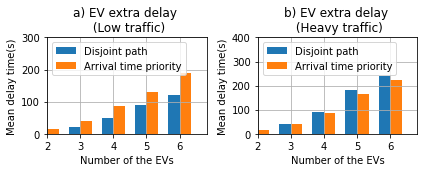

In [32]:
import matplotlib.pyplot as plt
import statistics
import csv
import numpy as np
plt.rcParams["figure.figsize"] = (6,2.5)
plt.figure()


plt.subplot(121)
N=5
ind = np.arange(N) 
width = 0.35    
extra_time1 = [15, 20, 49, 89, 121]
extra_time2 = [15, 40, 85, 130, 189]
plt.bar(ind, extra_time1, width, label='Disjoint path')
plt.bar(ind + width, extra_time2, width,
    label='Arrival time priority') 
plt.axis([1, 5, 0, 300])
plt.xticks(ind + width / 2, ('2', '3', '4', '5', '6'))
plt.xlabel('Number of the EVs')
plt.ylabel('Mean delay time(s)')
plt.title('a) EV extra delay \n (Low traffic)')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(122)

N=5
ind = np.arange(N) 
width = 0.35    
extra_time1 = [15, 40, 89, 180, 240]
extra_time2 = [16, 41, 86, 167, 223]
plt.bar(ind, extra_time1, width, label='Disjoint path')
plt.bar(ind + width, extra_time2, width,
    label='Arrival time priority') 
plt.axis([1, 5, 0, 400])
plt.xticks(ind + width / 2, ('2', '3', '4', '5', '6'))
plt.xlabel('Number of the EVs')
plt.ylabel('Mean delay time(s)')
plt.title('b) EV extra delay \n (Heavy traffic)')
plt.legend(loc='upper left')
plt.grid(True)


plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.tight_layout()
plt.savefig("result_multiple_EVs.pdf")
plt.savefig("result_multiple_EVs.eps", format="eps")
plt.show()



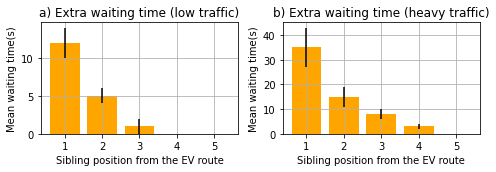

In [52]:
import matplotlib.pyplot as plt
import statistics
import csv
plt.rcParams["figure.figsize"] = (7,2.5)
plt.figure()


plt.subplot(121)

x1 = ['1', '2', '3', '4', '5']
extra_time1 = [12, 5, 1, 0, 0]
variance = [2, 1, 1, 0, 0]

x1_pos = [i for i, _ in enumerate(x)]

plt.bar(x1_pos, extra_time1, color='orange', yerr=variance) 
#plt.legend((r'$v$=10m/s', r'$v$=30m/s'),loc='lower right')
plt.xlabel('Sibling position from the EV route')
plt.ylabel('Mean waiting time(s)')
plt.title('a) Extra waiting time (low traffic)')
plt.xticks(x1_pos, x1)
plt.grid(True)


plt.subplot(122)
x = ['1', '2', '3', '4', '5']
extra_time = [35, 15, 8, 3, 0]
variance = [8, 4, 2, 1, 0]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, extra_time, color='orange', yerr=variance) 
#plt.legend((r'$v$=10m/s', r'$v$=30m/s'),loc='lower right')
plt.xlabel('Sibling position from the EV route')
plt.ylabel('Mean waiting time(s)')
plt.title('b) Extra waiting time (heavy traffic)')
plt.xticks(x_pos, x)
plt.grid(True)


plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.tight_layout()
plt.savefig("result_extra_time.pdf")
plt.savefig("result_extra_time.eps", format="eps")
plt.show()



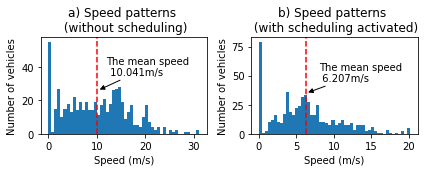

In [27]:
import matplotlib.pyplot as plt
import statistics
import csv
plt.rcParams["figure.figsize"] = (6,2.5)
plt.figure()

plt.subplot(121)

y3 = []
style = dict(size=10, color='blue')
with open('ccuits_limited2.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y3.append(float(row[5])*(5/18))
       # print(row)
    
plt.axvline(x=statistics.mean(y3), color='red', linestyle='--')
plt.annotate('The mean speed \n 10.041m/s', xy=(10.2, 26), xytext=(12,35),arrowprops=dict(facecolor='black', arrowstyle='-|>'))     
plt.hist(y3, bins=50)
plt.xlabel('Speed (m/s)') 
plt.ylabel('Number of vehicles')
plt.title('a) Speed patterns \n (without scheduling)')


plt.subplot(122)

y4 = []
style = dict(size=10, color='blue')
with open('ccuits_after_limited2.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        y4.append(float(row[5])*(5/18))
       # print(row)
     
plt.hist(y4, bins=50)
plt.axvline(x=statistics.mean(y4), color='red', linestyle='--')
plt.annotate('The mean speed \n 6.207m/s', xy=(6.3, 35), xytext=(8,45),arrowprops=dict(facecolor='black', arrowstyle='-|>'))     

plt.xlabel('Speed (m/s)') 
plt.ylabel('Number of vehicles')
plt.title('b) Speed patterns \n (with scheduling activated)')

plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.tight_layout()
plt.savefig("result_speed_distribution_traffic_control.pdf")
plt.savefig("result_speed_distribution_traffic_control.eps", format="eps")
plt.show()

